<a href="https://colab.research.google.com/github/MarcoC87/DataAnalytics/blob/main/MachineLearning/Regression/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Generate data (2 features example)

x_min = 0
x_max = 100
N = 100

x1 = np.random.uniform(x_min, x_max, size=N)
x2 = np.random.uniform(x_min, x_max, size=N)

X = np.column_stack((x1, x2)) # create (N * 2) array
y = 2*X[:,0] + X[:,1] + 5 + 20*np.random.randn(N)


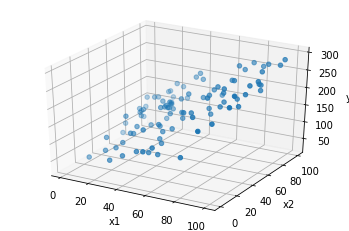

In [ ]:
# Plot data

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.scatter3D(x1, x2, y)

plt.show()

**How to find the line of best fit?**

Now $x_i$ contains multiple features so $\hat{y}_i$ will be given by

$\hat{y}_i = w_0 + w_1 x_{i1} + ... + w_D x_{iD} = w^{T}x_i$

where D is number of features.

In matrix form

$\hat{y}_{N\times 1} = X_{N \times D} w_{D \times 1}$

where N is the number of samples.
\begin{align}
\begin{bmatrix}
y_1\\
.\\
.\\
.\\
y_N 
\end{bmatrix}
=
\begin{bmatrix}
x_{11}&.&.&.&x_{1D}\\
.&.&.&.&.\\
.&.&.&.&.\\
.&.&.&.&.\\
x_{N1}&.&.&.&x_{ND}
\end{bmatrix}
\begin{bmatrix}
w_1\\
.\\
.\\
.\\
w_D 
\end{bmatrix}
\end{align}

we want to minimize the cost function (mean squared error)

$E = \frac{1}{N}\sum_i(y_i - \hat{y}_i)^2 = \frac{1}{N}\sum_i(y_i - w^{T}x_i)^2$


#### 1. **Calculating analytical solution with NumPy**

We can find the exact solution by solving

$\frac{\partial E}{\partial w_j} = \sum_i 2(y_i - w^T x_{ij})(-x_{ij}) = 0,\;\;\; j=1,...,D$

...obtaining

$w = (X^T X)^{-1} X^T y$

In [ ]:
# Numpy has a special function to solve linear equations
# Ax = b --> x = np.linalg.solve(A, b)

w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

y_pred = X.dot(w)

#### 2. **Using Scikit-Learn**

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)

y_pred = reg.predict(X)

#### **Diabetes example with Scikit-Learn**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [ ]:
X = diabetes.data
y = diabetes.target

# Splitting train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training set
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [ ]:
# The mean squared error
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: {:.2f}".format(r2_score(y_test, y_pred)))


Mean squared error: 2992.56
Coefficient of determination: 0.44
